In [1]:
from conphar.Pharmacophores import parse_json_pharmacophore, show_pharmacophoric_descriptors, save_pharmacophore_to_pymol, save_pharmacophore_to_json, compute_concensus_pharmacophore, get_ligand_receptor_pharmacophore
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.environ["LC_ALL"] = "C"
os.environ["LANG"] = "C"

ConPhar tools imported successfully


Next cell only works on Linux machines

In [ ]:
receptor_path = "../Data/target/AF-Q13705-ACVR2B_-_prepared.pdb"  # update with your actual receptor file

for file in os.listdir("../Data/other/SDF poses/"):
    if file.endswith(".sdf"):
        ligand_path = f"../Data/other/SDF poses/{file}"
        output_name = os.path.splitext(file)[0]
        out_path = f"../Results/pharmacophores/{output_name}"
        get_ligand_receptor_pharmacophore(receptor=receptor_path, ligand=ligand_path, out=out_path)

From here it works on all machines

In [2]:
cluster = 'cluster_2'

p4_table=pd.DataFrame()
for file in os.listdir(f'../Results/pharmacophores/{cluster}'):
    if '.json' in file:
        try:
            p4,lig,rec=parse_json_pharmacophore(f"../Results/pharmacophores/{cluster}/{file}")
            p4['ligand']=file.replace('.json','')
            p4_table=pd.concat([p4_table,p4],ignore_index=True)
        except Exception:
            pass

In [3]:
# rename colors
p4_table['color'] = p4_table['color'].replace({
    'navy': 'blue',
    'white': 'yellow',
})
p4_table = p4_table[~p4_table['name'].isin(['NegativeIon', 'PositiveIon'])]
p4_table

,enabled,name,radius,size,svector,vector,x,y,z,color,ligand
0,True,Aromatic,1.1,6,"{'x': -0.10016200444175, 'y': 0.99028781273480...","[{'x': -0.10016200444175, 'y': 0.9902878127348...",-1.417450,1.230533,-11.973800,purple,A1A29_9D8E
1,True,HydrogenDonor,0.5,1,"{'x': 0.3443271174677034, 'y': -0.570041043507...","[{'x': 0.3443271174677034, 'y': -0.57004104350...",-10.984700,1.253700,-14.062000,yellow,A1A29_9D8E
2,True,HydrogenAcceptor,0.5,1,"{'x': 0.4826555302767255, 'y': -0.866737688502...","[{'x': 0.4826555302767255, 'y': -0.86673768850...",-13.627500,0.787200,-10.599600,orange,A1A29_9D8E
3,True,HydrogenAcceptor,0.5,1,"{'x': 0.4981372262803224, 'y': -0.693798341212...","[{'x': 0.4981372262803224, 'y': -0.69379834121...",-4.744300,0.071800,-13.377600,orange,A1A29_9D8E
4,True,HydrogenAcceptor,0.5,1,"{'x': -0.2931585270901408, 'y': 0.580999177069...","[{'x': -0.2931585270901408, 'y': 0.58099917706...",-10.437800,2.376100,-12.116800,orange,A1A29_9D8E
5,True,HydrogenAcceptor,0.5,1,"{'x': 0.9635647083801332, 'y': 0.1530859098780...","[{'x': 0.9635647083801332, 'y': 0.153085909878...",0.446800,1.165400,-14.016100,orange,A1A29_9D8E
6,True,HydrogenAcceptor,0.5,1,"{'x': 0.3713125924723491, 'y': 0.9097295430245...","[{'x': 0.3713125924723491, 'y': 0.909729543024...",1.277300,1.583300,-11.514100,orange,A1A29_9D8E
7,True,HydrogenAcceptor,0.5,1,"{'x': 0.9754880529500843, 'y': 0.1649323515555...","[{'x': 0.9754880529500843, 'y': 0.164932351555...",-0.426600,1.650600,-9.415200,orange,A1A29_9D8E
8,True,Hydrophobic,1.0,6,NaN,NaN,-1.417450,1.230533,-11.973800,green,A1A29_9D8E
9,True,Hydrophobic,1.0,1,NaN,NaN,-0.006300,0.912800,-15.321500,green,A1A29_9D8E


In [169]:
# print sum of "Aromatic" in name column of p4_table
p4_table['name'].value_counts()

name
Hydrophobic         62
HydrogenAcceptor    55
Aromatic            22
HydrogenDonor       10
Name: count, dtype: int64

In [ ]:
os.makedirs(f'../Results/pharmacophores/{cluster}/consensus', exist_ok=True)
save_pharmacophore_to_pymol(p4_table,out_file=f'../Results/pharmacophores/{cluster}/consensus/all_features_{cluster}.pse')
save_pharmacophore_to_json(p4_table,out_file=f'../Results/pharmacophores/{cluster}/consensus/all_features_{cluster}.json')

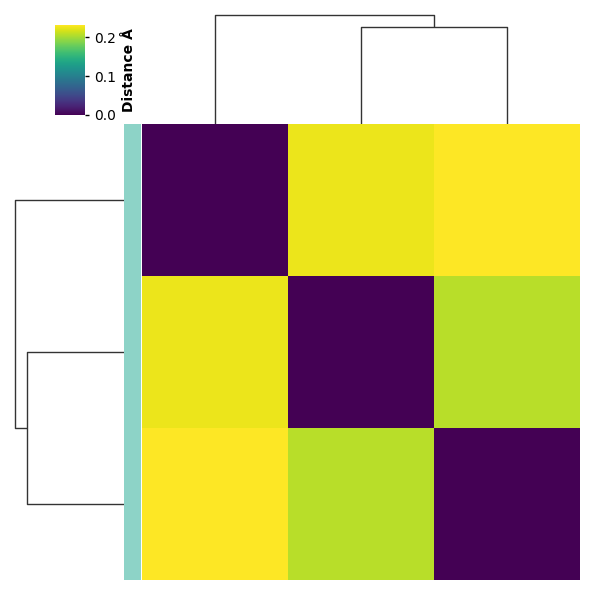

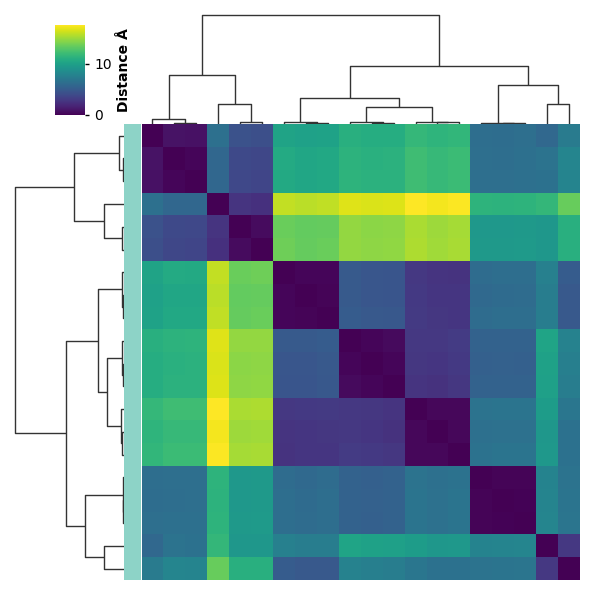

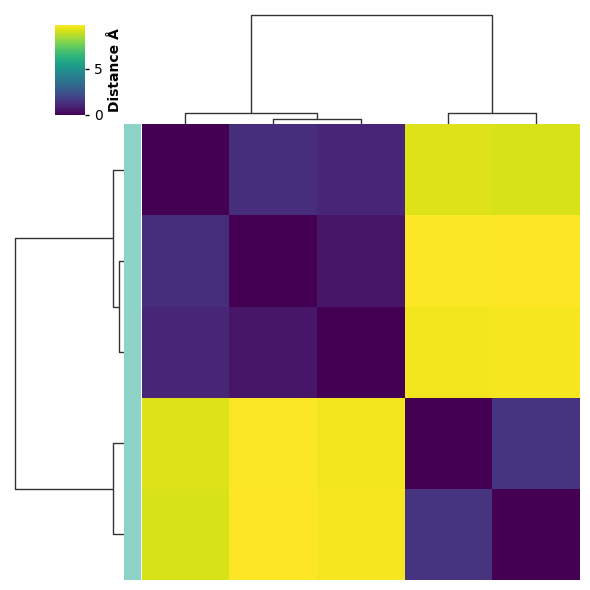

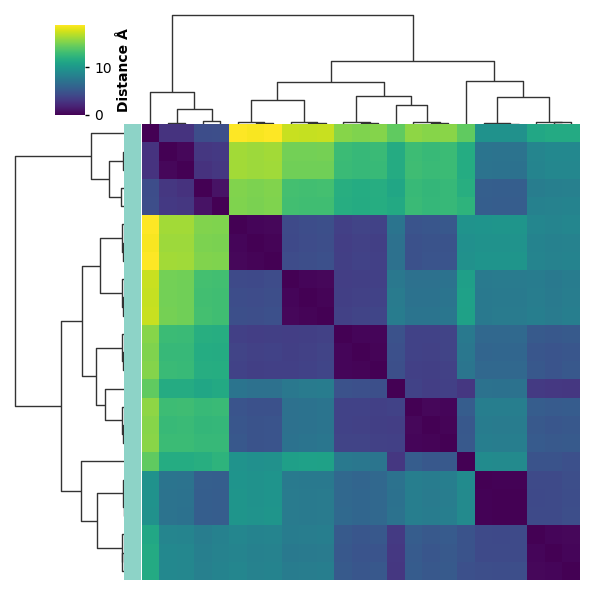

In [4]:
concensus,links=compute_concensus_pharmacophore(p4_table,save_data_per_descriptor=True,out_folder=f'../Results/pharmacophores/{cluster}/consensus',cmap_plots="viridis", h_dist=1.5,)

In [5]:
concensus['cluster'] = concensus['cluster'].astype(int)
concensus

,name,cluster,x,y,z,radius,color,weight,balance
1,Aromatic,1,-1.299011,1.232967,-11.947300,0.500000,purple,3.0,1.0
2,HydrogenAcceptor,1,-3.859802,1.517521,-11.803579,6.041681,orange,20.0,1.0
3,HydrogenDonor,1,-9.152569,2.747531,-11.959923,3.294310,yellow,5.0,1.0
4,Hydrophobic,1,-3.858042,1.451717,-11.640256,6.401829,green,25.0,1.0


In [ ]:
concensus.to_csv(f'../Results/pharmacophores/sub_models/consensus_weights_{cluster}.csv', index=False)

In [6]:
#remove all rows where weight < 2
concensus_test = concensus[concensus['weight'] >= 2]
len(concensus_test)

4

In [ ]:
save_pharmacophore_to_pymol(concensus,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}_concensus.pse',
select='concensus')
save_pharmacophore_to_json(concensus,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}_concensus.json')

manually make Weight dependant coloring

In [7]:
total_compounds = len(p4_table['ligand'].unique())
print(total_compounds)

weighting_list = concensus
weighting_list['frequency'] = weighting_list['weight'] / total_compounds


weighting_list

3


,name,cluster,x,y,z,radius,color,weight,balance,frequency
1,Aromatic,1,-1.299011,1.232967,-11.947300,0.500000,purple,3.0,1.0,1.000000
2,HydrogenAcceptor,1,-3.859802,1.517521,-11.803579,6.041681,orange,20.0,1.0,6.666667
3,HydrogenDonor,1,-9.152569,2.747531,-11.959923,3.294310,yellow,5.0,1.0,1.666667
4,Hydrophobic,1,-3.858042,1.451717,-11.640256,6.401829,green,25.0,1.0,8.333333


In [8]:
# print the top 4 best clusters based on normalized_frequency for each name
top_indices = weighting_list.groupby('name')['frequency'].nlargest(4).reset_index(level=0, drop=True).index
top_clusters = weighting_list.loc[top_indices]
top_clusters = top_clusters.sort_values(by='name')
top_clusters

,name,cluster,x,y,z,radius,color,weight,balance,frequency
1,Aromatic,1,-1.299011,1.232967,-11.947300,0.500000,purple,3.0,1.0,1.000000
2,HydrogenAcceptor,1,-3.859802,1.517521,-11.803579,6.041681,orange,20.0,1.0,6.666667
3,HydrogenDonor,1,-9.152569,2.747531,-11.959923,3.294310,yellow,5.0,1.0,1.666667
4,Hydrophobic,1,-3.858042,1.451717,-11.640256,6.401829,green,25.0,1.0,8.333333


In [12]:
# Define filters as a dictionary: feature name → list of clusters
filters = {
    'Aromatic': [1,12], #purple
    'Hydrophobic': [10], #green
    'HydrogenAcceptor': [9,6], #orange
    'HydrogenDonor': [2] #yellow
}

# Build a set of valid (name, cluster) pairs
valid_pairs = set()
for name, clusters in filters.items():
    for cluster in clusters:
        valid_pairs.add((name, cluster))

# Filter rows matching any of the (name, cluster) pairs
submodel_df = concensus[[ (row['name'], row['cluster']) in valid_pairs for _, row in concensus.iterrows() ]]

save_pharmacophore_to_json(submodel_df,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}/Submodel_4.json')

FileNotFoundError: [Errno 2] No such file or directory: '../Results/pharmacophores/2/consensus/2/Submodel_4.json'

In [9]:
from pymol import cmd
import pandas as pd
import IPython.display as Image

# Define subsets of the consensus DataFrame
subsets = {
    "Aromatic": weighting_list[weighting_list['name'] == 'Aromatic'],
    "Hydrophobic": weighting_list[weighting_list['name'] == 'Hydrophobic'],
    "HydrogenAcceptor": weighting_list[weighting_list['name'] == 'HydrogenAcceptor'],
    "HydrogenDonor": weighting_list[weighting_list['name'] == 'HydrogenDonor']
}

# Iterate over each subset
for subset_name, subset_data in subsets.items():
    cmd.reinitialize()  # Reset PyMOL session

    # Add pseudoatoms for the current subset
    for index, row in subset_data.iterrows():
        name = row['cluster']
        x, y, z = row['x'], row['y'], row['z']
        radius = row['radius']
        b = row['frequency']
        color = row['color']
        atom_name = f"{name}_{index}"
        cmd.pseudoatom(object=atom_name, pos=[x, y, z], vdw=radius, b=b)
        cmd.label(atom_name, f'"{name}"')

    # Apply coloring based on B-factor
    cmd.spectrum("b", palette=f"white {color}", selection="*")

    # Group everything and save the PyMOL session
    cmd.group(subset_name, '*')
    cmd.center('all')
    cmd.show('spheres')
    cmd.save(f'../Results/pharmacophores/{cluster}/consensus/{subset_name}_clusters_by_weight.pse')
    
    # Take snapshot and show in notebook
    cmd.ray(800, 600)
    img_file = f"/tmp/{subset_name}.png"
    cmd.png(img_file)
    Image(filename='/tmp/view.png')

TypeError: 'module' object is not callable

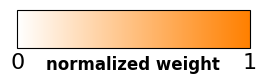

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(3, 1))
fig.subplots_adjust(bottom=0.5)

# Create a colormap from white to purple using RGB values
cmap = mpl.colors.LinearSegmentedColormap.from_list('white_blue', ['white', (1, 0.5, 0)])

# Create a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

# Set the ticks to only 0 and 100
cb1.set_ticks([0,1])

# Remove other ticks and labels
cb1.ax.tick_params(axis='x', which='both', length=0, labelsize=16)  # Enlarge and bold tick numbers

# Enlarge and bold the label
cb1.set_label('normalized weight', fontsize=12, fontweight='bold',labelpad=-12)

# Remove background color
cb1.ax.set_facecolor('none')

# Save the figure to a PNG file
plt.savefig('../Results/images/color keys/color_key_orange.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.show()


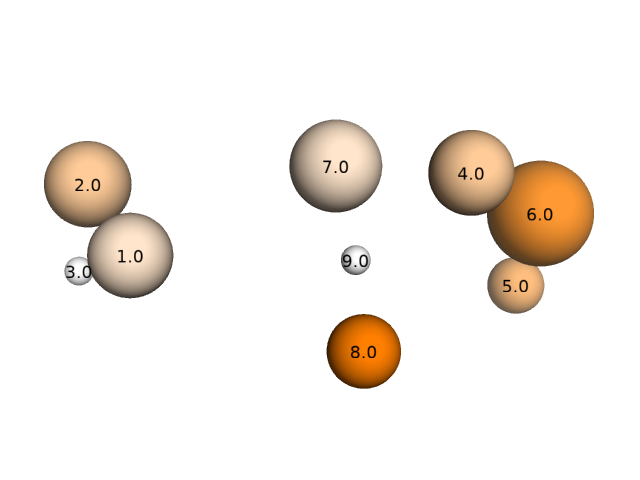

In [14]:
import pymol2
from IPython.display import Image
import tempfile

def Weighted_cluster_coloring(label_pos=[0,0,9], label_size=18, bg_color='white', visible_structure=False):
    with pymol2.PyMOL() as pymol:
        cmd = pymol.cmd
        cmd.load('../Results/pharmacophores/cluster_1/consensus/HydrogenAcceptor_clusters_by_weight.pse')
        
        cmd.load('../Data/target/AF-Q13705-ACVR2B_-_prepared.pdb', 'receptor')
        if visible_structure:
            cmd.show('cartoon', 'receptor')
        else:
            cmd.hide('everything', 'receptor')
        
        cmd.set('cartoon_transparency', 0.7)
        cmd.set('cartoon_color', 'lightpink')

        cmd.set('specular', 0)
        cmd.set('ray_shadows', 0)
        cmd.orient('HydrogenAcceptor')
        cmd.set('label_size', label_size)
        cmd.set('label_position', label_pos)
        cmd.bg_color(bg_color)
        

        img_path = os.path.join(tempfile.gettempdir(), "pymol_out.png")
        cmd.png(img_path, ray=1)
        return Image(img_path)

# Example call
Weighted_cluster_coloring(label_pos=[0, 0, 5], label_size=17, bg_color='white', visible_structure=False)
